In [19]:
# เติมค่าที่เป็น None หรือ NaN ด้วยค่าว่าง ('') ใน clean_email_from
phishing_data.loc[:, 'clean_email_from'] = phishing_data['clean_email_from'].fillna('')

In [20]:
# ฟังก์ชันสำหรับดึง domain พร้อมเพิ่ม @ ข้างหน้า
def extract_domain(email_text):
    # ใช้ regex เพื่อดึงเฉพาะ domain (@xxxx.com)
    match = re.search(r'@([\w\.-]+)', email_text)
    if match:
        return '@' + match.group(1)  # เพิ่ม @ ข้างหน้า domain
    return None  # กรณีไม่มี domain

In [21]:
# ดึง domain ออกจาก clean_email_from
phishing_data.loc[:, 'domain'] = phishing_data['clean_email_from'].apply(extract_domain)

In [22]:
# ตรวจสอบจำนวนค่าที่เป็น None ใน domain (หากยังมี)
print(f"จำนวนค่าที่ไม่มี domain: {phishing_data['domain'].isna().sum()}")

จำนวนค่าที่ไม่มี domain: 17


In [23]:
# นับความถี่ของ domain และเลือก Top 10
top_domains = phishing_data['domain'].value_counts().head(10).reset_index()
top_domains.columns = ['domain', 'frequency']

In [24]:
# แสดงผล top 10 domain
print("\nTop 10 domains:")
print(top_domains)


Top 10 domains:
                 domain  frequency
0   @scd.desjardins.com       1497
1  @speedy.uwaterloo.ca        358
2            @yahoo.com        299
3          @hotmail.com        241
4   @flax9.uwaterloo.ca        184
5     @plg.uwaterloo.ca        166
6       @desjardins.com        163
7              @163.com         96
8              @aol.com         94
9          @verizon.net         92


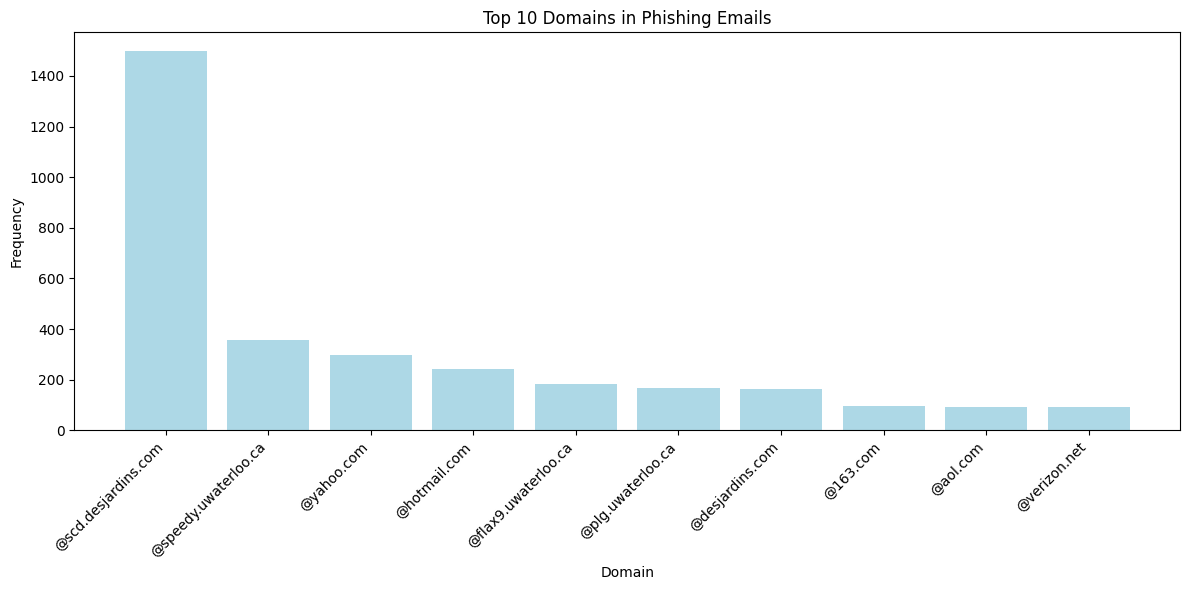

In [25]:
# วาดกราฟ Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(top_domains['domain'], top_domains['frequency'], color='lightblue')
plt.title("Top 10 Domains in Phishing Emails")
plt.xlabel("Domain")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [26]:
# บันทึกผลลัพธ์เป็น CSV
top_domains.to_csv('Top10_Phishing_Domains.csv', index=False)